# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

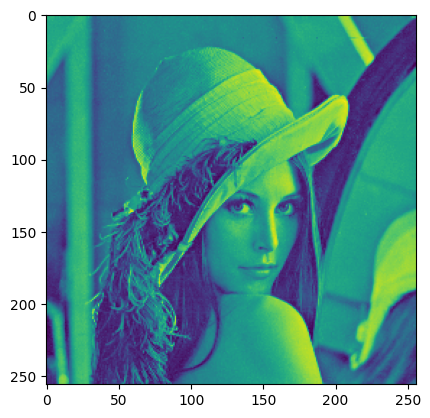

In [3]:
img = plt.imread('data/lena.png') #load image
plt.imshow(img)

In [11]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0  # Zahlstart
        for q in numpy.ndindex(size, size):
            # write your code here
            x = p[0] + q[0] - n
            y = p[1] + q[1] - n
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]: # x/y ist im Bild
                neighborhood_sum += img[x, y] # summieren
        # ...
        result[p] = neighborhood_sum / (size ** 2) # Mittelwertsrechnung
    # write your code here
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

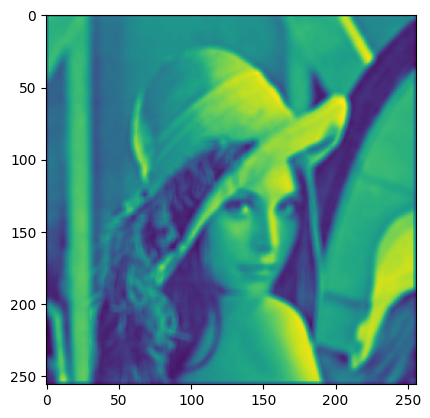

In [12]:
img1 = meanfilter(img,5)
plt.imshow(img1) 

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [20]:
img_correct = plt.imread('data/lena_meanfilter5.png')

# Perform mean filtering on the input image to get img1 (assuming img is already defined)
img1 = meanfilter(img, 5)

# Compare img1 with the correct result image
assert numpy.allclose(img1, img_correct, atol=1/255)

AssertionError: 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [27]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size -1) // 2

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            neighborhood =[]
            for x in range(max(0, i - n), min(img.shape[0], i + n + 1)):  # Step 2.1: Iterate over neighborhood rows
                for y in range(max(0, j - n), min(img.shape[1], j + n + 1)):  # Step 2.1: Iterate over neighborhood columns
                    neighborhood.append(img[x, y])  # Step 2.1: Add pixel value to the neighborhood list
            
            neighborhood.sort()  # Step 2.2: Sort the neighborhood list
            median_value = neighborhood[len(neighborhood) // 2]  # Step 2.2: Read the central value (median)
            result[i, j] = median_value
    # write your code here
    

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

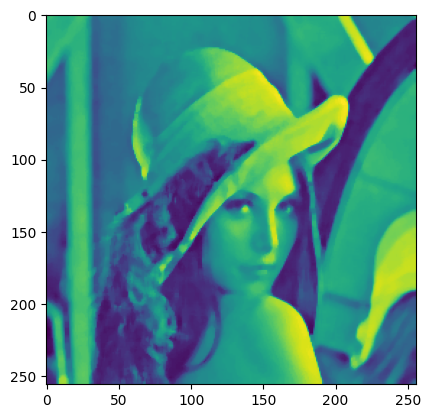

In [28]:
img3 = medianfilter(img,5)
plt.imshow(img3)

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [32]:
img4 = plt.imread('data/lena_medianfilter5.png')
assert numpy.allclose(img3, img4, atol=1/255)

AssertionError: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [33]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

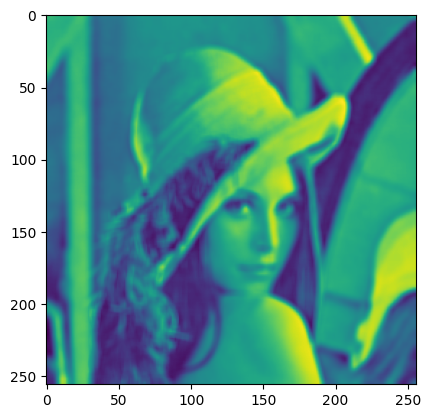

In [36]:
scipy.ndimage.uniform_filter(img, 5)
plt.imshow(scipy.ndimage.uniform_filter(img, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

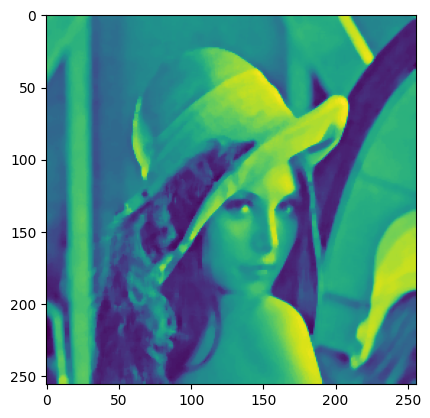

In [37]:
plt.imshow(scipy.ndimage.median_filter(img, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

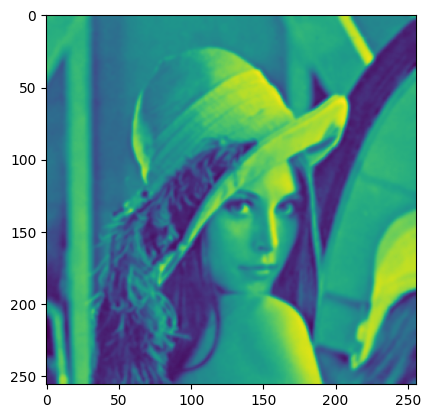

In [39]:
plt.imshow(scipy.ndimage.gaussian_filter(img, 1))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: